# IPIP 300 Items Example (N=307,313)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/psyphh/xifa/blob/master/examples/ipip300v2.ipynb)

In [1]:
!pip install pyreadstat
!pip install --upgrade xifa

In [2]:
import requests, zipfile, os, pyreadstat
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
from xifa import GPCM
jax.config.update("jax_enable_x64", True)

In [3]:
def download_dataset(dataset_url, dataset_name):
    req = requests.get(dataset_url, allow_redirects=True)
    open(dataset_name + '.zip', "wb").write(req.content)
    zipfile.ZipFile(dataset_name +'.zip').extractall()
    os.remove(dataset_name + '.zip')
    
dataset_url = 'https://files.osf.io/v1/resources/wxvth/providers/osfstorage/563a63388c5e4a127477d063?action=download&direct&version=1'
dataset_name = 'ipip300v2'
download_dataset(dataset_url, dataset_name)

In [4]:
data, _ = pyreadstat.read_por("IPIP300.por")
data = data.iloc[:,10:310].apply(
    lambda x: x.astype("float64")).replace({0:np.nan})
data = data.loc[:, ['I1', 'I31', 'I61', 'I91', 'I121',
                    'I151', 'I181', 'I211', 'I241', 'I271',
                    'I6', 'I36', 'I66', 'I96', 'I126',
                    'I156', 'I186', 'I216', 'I246', 'I276',
                    'I11', 'I41', 'I71', 'I101', 'I131', 
                    'I161', 'I191', 'I221', 'I251', 'I281',
                    'I16', 'I46', 'I76', 'I106', 'I136', 
                    'I166', 'I196', 'I226', 'I256', 'I286',
                    'I21', 'I51', 'I81', 'I111', 'I141',
                    'I171', 'I201', 'I231', 'I261', 'I291',
                    'I26', 'I56', 'I86', 'I116', 'I146',
                    'I176', 'I206', 'I236', 'I266', 'I296',
                    'I2', 'I32', 'I62', 'I92', 'I122',
                    'I152', 'I182', 'I212', 'I242', 'I272',
                    'I7', 'I37', 'I67', 'I97', 'I127',
                    'I157', 'I187', 'I217', 'I247', 'I277',
                    'I12', 'I42', 'I72', 'I102', 'I132',
                    'I162', 'I192', 'I222', 'I252', 'I282',
                    'I17', 'I47', 'I77', 'I107', 'I137',
                    'I167', 'I197', 'I227', 'I257', 'I287',
                    'I22', 'I52', 'I82', 'I112', 'I142', 
                    'I172', 'I202', 'I232', 'I262', 'I292',
                    'I27', 'I57', 'I87', 'I117', 'I147', 
                    'I177', 'I207', 'I237', 'I267', 'I297',
                    'I3', 'I33', 'I63', 'I93', 'I123', 
                    'I153', 'I183', 'I213', 'I243', 'I273',
                    'I8', 'I38', 'I68', 'I98', 'I128',
                    'I158', 'I88', 'I218', 'I248', 'I278',
                    'I13', 'I43', 'I73', 'I103', 'I133',
                    'I163', 'I193', 'I223', 'I253', 'I283',
                    'I18', 'I48', 'I78', 'I108', 'I138', 
                    'I168', 'I198', 'I228', 'I258', 'I288',
                    'I23', 'I53', 'I83', 'I113', 'I143',
                    'I173', 'I203', 'I233', 'I263', 'I293',
                    'I28', 'I58', 'I88', 'I118', 'I148', 
                    'I178', 'I208', 'I238', 'I268', 'I298',
                    'I4', 'I34', 'I64', 'I94', 'I124', 
                    'I154', 'I184', 'I214', 'I244', 'I274',
                    'I9', 'I39', 'I69', 'I99', 'I129', 
                    'I159', 'I189', 'I219', 'I249', 'I279',
                    'I14', 'I44', 'I74', 'I104', 'I134',
                    'I164', 'I194', 'I224', 'I254', 'I284',
                    'I19', 'I49', 'I79', 'I109', 'I139', 
                    'I169', 'I199', 'I229', 'I259', 'I289',
                    'I24', 'I54', 'I84', 'I114', 'I144', 
                    'I174', 'I204', 'I234', 'I264', 'I294',
                    'I29', 'I59', 'I80', 'I119', 'I149', 
                    'I179', 'I209', 'I239', 'I269', 'I299',
                    'I5', 'I35', 'I65', 'I95', 'I125', 
                    'I155', 'I185', 'I215', 'I245', 'I275',
                    'I10', 'I40', 'I70', 'I100', 'I130',
                    'I160', 'I190', 'I220', 'I250', 'I280',
                    'I15', 'I45', 'I75', 'I105', 'I135',
                    'I165', 'I195', 'I225', 'I255', 'I285',
                    'I20', 'I50', 'I80', 'I110', 'I140', 
                    'I170', 'I200', 'I230', 'I260', 'I290',
                    'I25', 'I55', 'I85', 'I115', 'I145',
                    'I175', 'I205', 'I235', 'I265', 'I295',
                    'I30', 'I60', 'I90', 'I120', 'I150', 
                    'I180', 'I210', 'I240', 'I270', 'I300']]
data = jnp.array(data.values - 1)

In [5]:
n_factors = 30
n_items = 300
items_per_factor = int(n_items / n_factors)
patterns = {"loading":{
    m: list(
        range(
            m * items_per_factor, (m + 1) * items_per_factor)) for m in range(n_factors)}}
gpcm = GPCM(data=data, 
            n_factors=n_factors, 
            patterns=patterns, 
            init_frac = .20)
gpcm.fit(corr_update="empirical",
         batch_size=80000)

A GPCM Object is Initialized for Confirmatory Analysis.
 + Number of Cases: 307313
 + Number of Items: 300
 + Number of Factors: 30
 + Number of Categories: 5
Fitting Process is Started.


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Converged after 511 Iterations (799.13 sec).


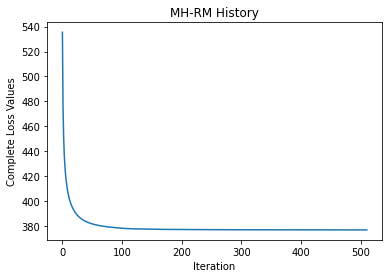

In [6]:
import matplotlib.pyplot as plt
plt.plot(gpcm.trace["closs"])
plt.ylabel('Complete Loss Values')
plt.xlabel('Iteration')
plt.title('MH-RM History')
plt.show()